## Visualization Notebook for RQ1
This notebook contains visualization of the results generated by RQ1.py
Specifically, it generates Figure 2 (trend analysis) and Figure 3 (cancelling effect of alpha and f(x))

In [1]:
"""
Adapted from: Kobayashi et al. (https://github.com/gorokoba560/norm-analysis-of-transformer)
"""
import pickle, os, glob
from itertools import chain
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import torch
import pandas as pd
plt.style.use(['science', 'grid'])

In [2]:
import json

In [3]:
def read_pickle_file(filename):
     try:
         with open(filename, 'rb') as file:
             data = pickle.load(file)
             return data
     except FileNotFoundError:
         print(f"File '{filename}' not found.")
         return None
     except pickle.UnpicklingError as e:
         print(f"Error unpickling '{filename}': {e}")
         return None

In [4]:
# Change this to python if you want to visualize the results for the python corpus
lang = "java"
output = os.path.join("..", "results", lang)

In [5]:
x = [k+1 for k in range(12)]

/tmp/ipykernel_22885/1018767560.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


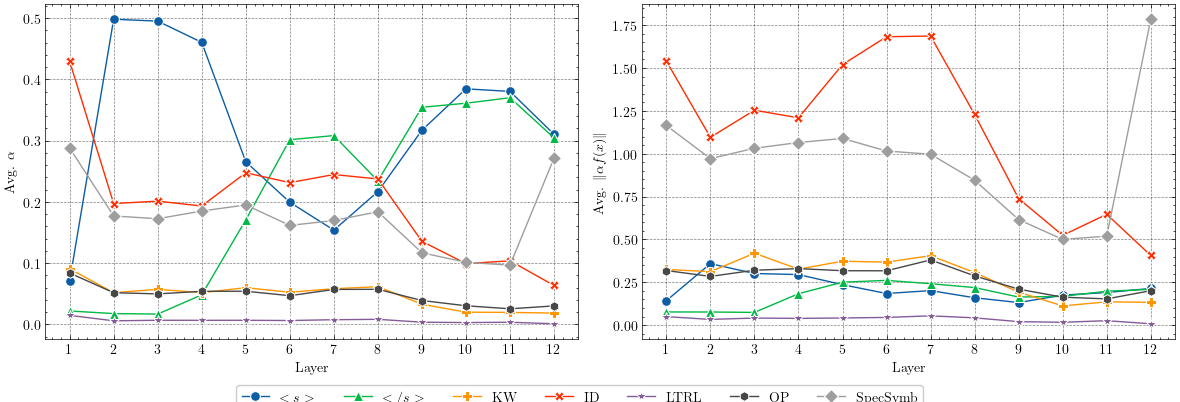

In [6]:
markers = ["o", "^", "P", "X", "*", "h", "D"]
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# Plotting attention scores variation in each of the 12 layers w.r.t each token category
label = ["$<s>$", "$</s>$", "KW", "ID", "LTRL", "OP", "SpecSymb"]
i = 0
cls_a_layer_lis = torch.load(os.path.join(output, "cls_a_layer_lis"))
sep_a_layer_lis = torch.load(os.path.join(output, "sep_a_layer_lis"))
kw_a_layer_lis = torch.load(os.path.join(output, "kw_a_layer_lis"))
ident_a_layer_lis = torch.load(os.path.join(output, "ident_a_layer_lis"))
literal_a_layer_lis = torch.load(os.path.join(output, "literal_a_layer_lis"))
op_a_layer_lis = torch.load(os.path.join(output, "op_a_layer_lis"))
spec_symb_a_layer_lis = torch.load(os.path.join(output, "spec_symb_a_layer_lis"))
for a in [cls_a_layer_lis, sep_a_layer_lis, kw_a_layer_lis, ident_a_layer_lis, literal_a_layer_lis, op_a_layer_lis, spec_symb_a_layer_lis]:
    sns.lineplot(x=x, y=a, label=label[i], ax=axs[0], marker=markers[i], markersize=7)
    i+=1

# Plotting afx scores variation in each of the 12 layers w.r.t each token category
cls_afx_layer_lis = torch.load(os.path.join(output, "cls_afx_layer_lis"))
sep_afx_layer_lis = torch.load(os.path.join(output, "sep_afx_layer_lis"))
kw_afx_layer_lis = torch.load(os.path.join(output, "kw_afx_layer_lis"))
ident_afx_layer_lis = torch.load(os.path.join(output, "ident_afx_layer_lis"))
literal_afx_layer_lis = torch.load(os.path.join(output, "literal_afx_layer_lis"))
op_afx_layer_lis = torch.load(os.path.join(output, "op_afx_layer_lis"))
spec_symb_afx_layer_lis = torch.load(os.path.join(output, "spec_symb_afx_layer_lis"))
i = 0
#plt.figure(figsize=(8, 8))
for afx in [cls_afx_layer_lis, sep_afx_layer_lis, kw_afx_layer_lis, ident_afx_layer_lis, literal_afx_layer_lis, op_afx_layer_lis, spec_symb_afx_layer_lis]:
    sns.lineplot(x=x, y=afx, label=label[i], ax=axs[1], marker=markers[i], markersize=7)
    i+=1
    
axs[0].set_xlabel("Layer")
axs[1].set_xlabel("Layer")

axs[0].set_ylabel(r"Avg. $\alpha$")
axs[1].set_ylabel(r"Avg. $\lVert \alpha f(x) \rVert$")

axs[0].set_xticks(x)
axs[1].set_xticks(x)

handles, labels = [(a + b) for a, b in zip(axs[0].get_legend_handles_labels(), axs[1].get_legend_handles_labels())]
[axis.get_legend().remove() for axis in axs]
plt.tight_layout()
fig.legend(handles, label, loc=(0.2, -0.02), ncol=len(label))
#plt.legend(ncol=len(attn_scores))
fig.show()
#fig.savefig(f"a_vs_afx_{lang}.pdf")

In [8]:
cls_lists = [torch.load(os.path.join(output, "cls_a_head_lis")), torch.load(os.path.join(output, "cls_fx_head_lis")), torch.load(os.path.join(output, "cls_afx_head_lis"))]
sep_lists = [torch.load(os.path.join(output, "sep_a_head_lis")), torch.load(os.path.join(output, "sep_fx_head_lis")), torch.load(os.path.join(output, "sep_afx_head_lis"))]

kw_lists = [torch.load(os.path.join(output, "kw_a_head_lis")), torch.load(os.path.join(output, "kw_fx_head_lis")), torch.load(os.path.join(output, "kw_afx_head_lis"))]
op_lists = [torch.load(os.path.join(output, "op_a_head_lis")), torch.load(os.path.join(output, "op_fx_head_lis")), torch.load(os.path.join(output, "op_afx_head_lis"))]
ident_lists = [torch.load(os.path.join(output, "ident_a_head_lis")), torch.load(os.path.join(output, "ident_fx_head_lis")), torch.load(os.path.join(output, "ident_afx_head_lis"))]
literal_lists = [torch.load(os.path.join(output, "literal_a_head_lis")), torch.load(os.path.join(output, "literal_fx_head_lis")), torch.load(os.path.join(output, "literal_afx_head_lis"))]
spec_symb_lists = [torch.load(os.path.join(output, "spec_symb_a_head_lis")), torch.load(os.path.join(output, "spec_symb_fx_head_lis")), torch.load(os.path.join(output, "spec_symb_afx_head_lis"))]

In [9]:
label = ["CLS", "SEP", "KW", "ID", "LTRL", "OP", "SpecSymb"]
lang = "java"

In [ ]:
i = 0
fs = 15
for a, fx, afx in [cls_lists, sep_lists, kw_lists, op_lists, ident_lists, literal_lists, spec_symb_lists]:
    print("----------",label[i],"----------")
    print("attention weight α")
    plt.figure()
    df = pd.DataFrame(a, columns=range(1,13), index=range(1,13))
    sns.heatmap(df,vmax=1,vmin=0,cmap="Blues",square=True)
    plt.xlabel('Head',fontsize=fs)
    plt.ylabel('Layer',fontsize=fs)
    plt.gcf().subplots_adjust(bottom=0.2)
    #plt.savefig(f"./heatmaps/{lang}_{label[i]}_alpha.svg")
    plt.show()
    
    print("\nnorm of transformed vector ||f(x)||")
    plt.figure()
    max_norm = max(max(fx))
    df = pd.DataFrame(fx, columns=range(1,13), index=range(1,13))
    sns.heatmap(df,vmin=0,vmax=max_norm,cmap="Blues",square=True)
    plt.xlabel('Head',fontsize=fs)
    plt.ylabel('Layer',fontsize=fs)
    plt.gcf().subplots_adjust(bottom=0.2)
    #plt.savefig(f"./heatmaps/{lang}_{label[i]}_fx.svg")
    plt.show()
    
    print("\nnorm of weighted vector ||αf(x)||")
    plt.figure()
    df = pd.DataFrame(afx, columns=range(1,13), index=range(1,13))
    sns.heatmap(df,vmin=0,vmax=max_norm,cmap="Blues",square=True)
    plt.xlabel('Head',fontsize=fs)
    plt.ylabel('Layer',fontsize=fs)
    plt.gcf().subplots_adjust(bottom=0.2)
    #plt.savefig(f"./heatmaps/{lang}_{label[i]}_afx.svg")
    plt.show()
    i += 1
    print()